### Quantum Cryptography - Day8
# Entanglement for Cryptography
Quantum Entanglement is the oe of the mst powerful non-classical feature of qunatum mechanic.In crptography entanglement allows two ditant parties to share perfectly correlated information in a way that cannot be explained or reproduced by classical physics.

#### Why entanglement is Important in cryptography?
In classical cryptography,security is based on computational hardness.In qunatum cryptography,security from **physical laws**. entanglement provides:
- Perfect correlation between distant qubit
- Detection of vesdropping
- Security independent of computation power

if an attacker tries to intercept or measure an entanglement qubit ,the qunatum correlation change.revealing the the presence of the attacker .This is why entanglement is a **Security guarantee** not just a feature .

In this notebook , we will explore entanglenent step by step using a bell state .in thi we will learn:
- Create a **Bell state**(Maximally entangled state)
- Measure corelation between entangled qubits
- Observe perfect correalation
- Visualize entanglement using a **joint probability matrix**
- understand how entanglement supports secure cryptographic protocols 

## Import Required Libraries

In [2]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

## Step 1 : Create Bell state
A Bell state is a **Maximally Entangled two-qubit state**.There are foure bell state . one comman bell state we used here for implementation is:
$$|\phi^+\rangle=\frac{|00\rangle +|11\rangle}{\sqrt{2}} $$
This state means:
- If the first qubit is measured as '0' , the second is always '0'
- If the first qubit is measured as '1' , the second is always '1'
- The outcome is random,but  the correlation is perfect.

This perfect correlation is what make Bells States useful for cryptography.

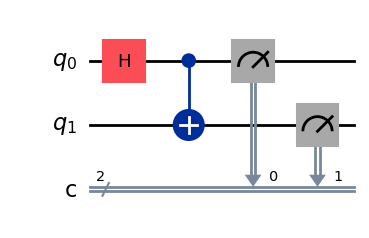

In [3]:
qc=QuantumCircuit(2,2)
# Apply hadamard gate on qubit 0
qc.h(0)
#Aplyy cnot gate on 0,1
qc.cx(0,1)
# measure
qc.measure([0,1],[0,1])
qc.draw('mpl')

## Step 2 : Measure correlation
To verify entanglement , we run the circuit many times(shots).we then analyze how often each measure outcome occures.If qubit is entangled:
- '00' and '11' should dominate
- '01' and '10' should be nearly zero 

This behavior cannot explain classically.

In [6]:
sim=AerSimulator()
job=sim.run(qc,shots=1024)
result=job.result()
counts=result.get_counts()
counts

{'11': 481, '00': 543}

## Visualize Result


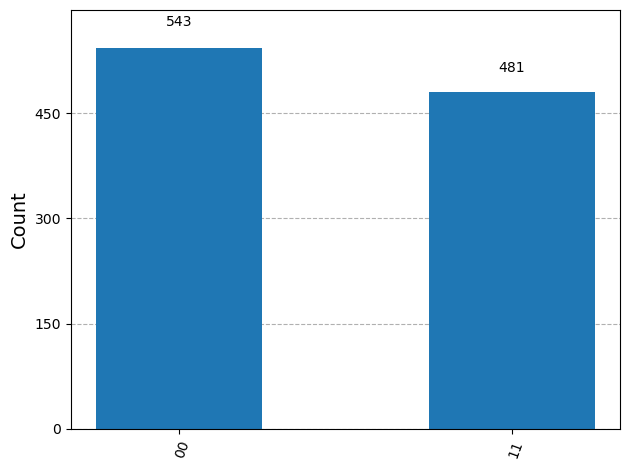

In [7]:
plot_histogram(counts)

We seen above histogram shows near 50% probabilyty for '11' and same for '00'. this confirms perfect correlation , a signature of entanglement.

#### What is Perfect correlation?
Even though each qubit individually looks random,their joint measurement is perfectly correlated.This means:
- Measuring one qubit instantly determines the other.
- Distance does not matter
- No classical communication is required

In cryptography ,this allows two parties to share identical secrete bits.

## Step 3 - Compute Joint Probability matrix
A Joint Probability matrix shows how often each pair of outcome occures.for two qubits ,the matrix looks like:

| Qubit 0 \ Qubit 1 | 0 | 1 |
|-------|-----|---|
| 0 | P(00) | P(01) |
| 1 | P(10) | P(11) |

for Bell State:
- P(00) near  0.5
- P(11) near  0.5
- Other near 0

In [8]:
prob_matrix=np.zeros((2,2))
shots = sum(counts.values())
for outcome ,count in counts.items():
    q1=int(outcome[0])
    q0=int(outcome[1])
    prob_matrix[q0][q1] =count/shots
prob_matrix

array([[0.53027344, 0.        ],
       [0.        , 0.46972656]])

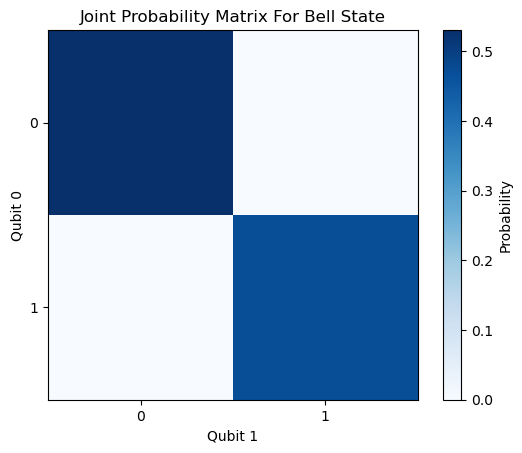

In [10]:
## Plot Joint Probability Matrix
plt.imshow(prob_matrix,cmap='Blues')
plt.colorbar(label="Probability")
plt.xticks([0,1],['0','1'])
plt.yticks([0,1],['0','1'])
plt.xlabel("Qubit 1")
plt.ylabel("Qubit 0")
plt.title("Joint Probability Matrix For Bell State")
plt.show()

## Quantum Cryptography Connection
In Entanglement-Based QKD:
- Alice Measures one qubit
- Bob measures the other
- Matching Measurement Bases produce identical keys 
- Evesdropping breaks correlation
- provide secure Quantum connection

---

**Author** : Shreya Palase

**Repository**: Quantum-Cryptography(codeQubit)

**file** : day08_Entanglement_For_Cryptography.ipynb

**Date created**: 31-Janaury-2026

<sub>© Shreya Palase- All Rights Reserved.This notebook is part of a structured learning series designed for Github publication.</sub>